In [185]:
import numpy as np
import pandas as pd

In [186]:
netflix = pd.read_csv('NFLX.csv')
netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


# Working with Date Column

In [187]:
netflix['Date']

0       2002-05-23
1       2002-05-24
2       2002-05-28
3       2002-05-29
4       2002-05-30
           ...    
5039    2022-05-27
5040    2022-05-31
5041    2022-06-01
5042    2022-06-02
5043    2022-06-03
Name: Date, Length: 5044, dtype: object

In [188]:
netflix['Date'] = pd.to_datetime(netflix['Date'])

In [189]:
netflix['year'] = netflix['Date'].dt.year
netflix['month'] = netflix['Date'].dt.month
netflix['day'] = netflix['Date'].dt.day

In [190]:
netflix.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,5,23
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,5,24
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,5,28


In [191]:
netflix.drop('Date', axis=1, inplace=True)

In [192]:
netflix.head()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,5,23
1,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,5,24
2,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,5,28
3,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002,5,29
4,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002,5,30


# Asking six questions 

In [193]:
netflix.shape

(5044, 9)

In [194]:
netflix.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
year         0
month        0
day          0
dtype: int64

In [195]:
netflix.duplicated().sum()

0

In [196]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5044 non-null   float64
 1   High       5044 non-null   float64
 2   Low        5044 non-null   float64
 3   Close      5044 non-null   float64
 4   Adj Close  5044 non-null   float64
 5   Volume     5044 non-null   int64  
 6   year       5044 non-null   int32  
 7   month      5044 non-null   int32  
 8   day        5044 non-null   int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 295.7 KB


In [197]:
netflix.describe()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03,5044.000000,5044.000000,5044.000000
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07,2011.905630,6.545797,15.737708
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07,5.798402,3.423809,8.758690
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05,2002.000000,1.000000,1.000000
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06,2007.000000,4.000000,8.000000
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07,2012.000000,7.000000,16.000000
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07,2017.000000,10.000000,23.000000
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08,2022.000000,12.000000,31.000000


# EDA

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

In [199]:
corr = netflix.corr()

In [200]:
corr

,Open,High,Low,Close,Adj Close,Volume,year,month,day
Open,1.000000,0.999863,0.999853,0.999695,0.999695,-0.262560,0.814140,-0.004033,-0.003739
High,0.999863,1.000000,0.999815,0.999861,0.999861,-0.261281,0.814615,-0.004482,-0.003833
Low,0.999853,0.999815,1.000000,0.999856,0.999856,-0.264033,0.813706,-0.003523,-0.003572
Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548,0.814257,-0.004129,-0.003773
Adj Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548,0.814257,-0.004129,-0.003773
Volume,-0.262560,-0.261281,-0.264033,-0.262548,-0.262548,1.000000,-0.108797,-0.044664,0.032562
year,0.814140,0.814615,0.813706,0.814257,0.814257,-0.108797,1.000000,-0.072108,-0.006204
month,-0.004033,-0.004482,-0.003523,-0.004129,-0.004129,-0.044664,-0.072108,1.000000,-0.001500
day,-0.003739,-0.003833,-0.003572,-0.003773,-0.003773,0.032562,-0.006204,-0.001500,1.000000


<Axes: >

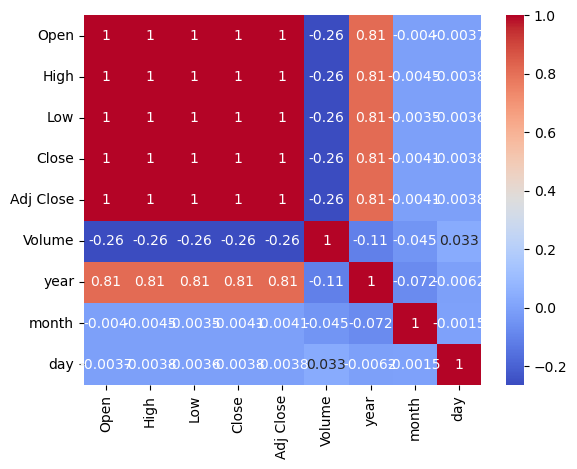

In [201]:
sns.heatmap(corr, annot=True,cmap='coolwarm', cbar=True)

# Data Scatterness

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


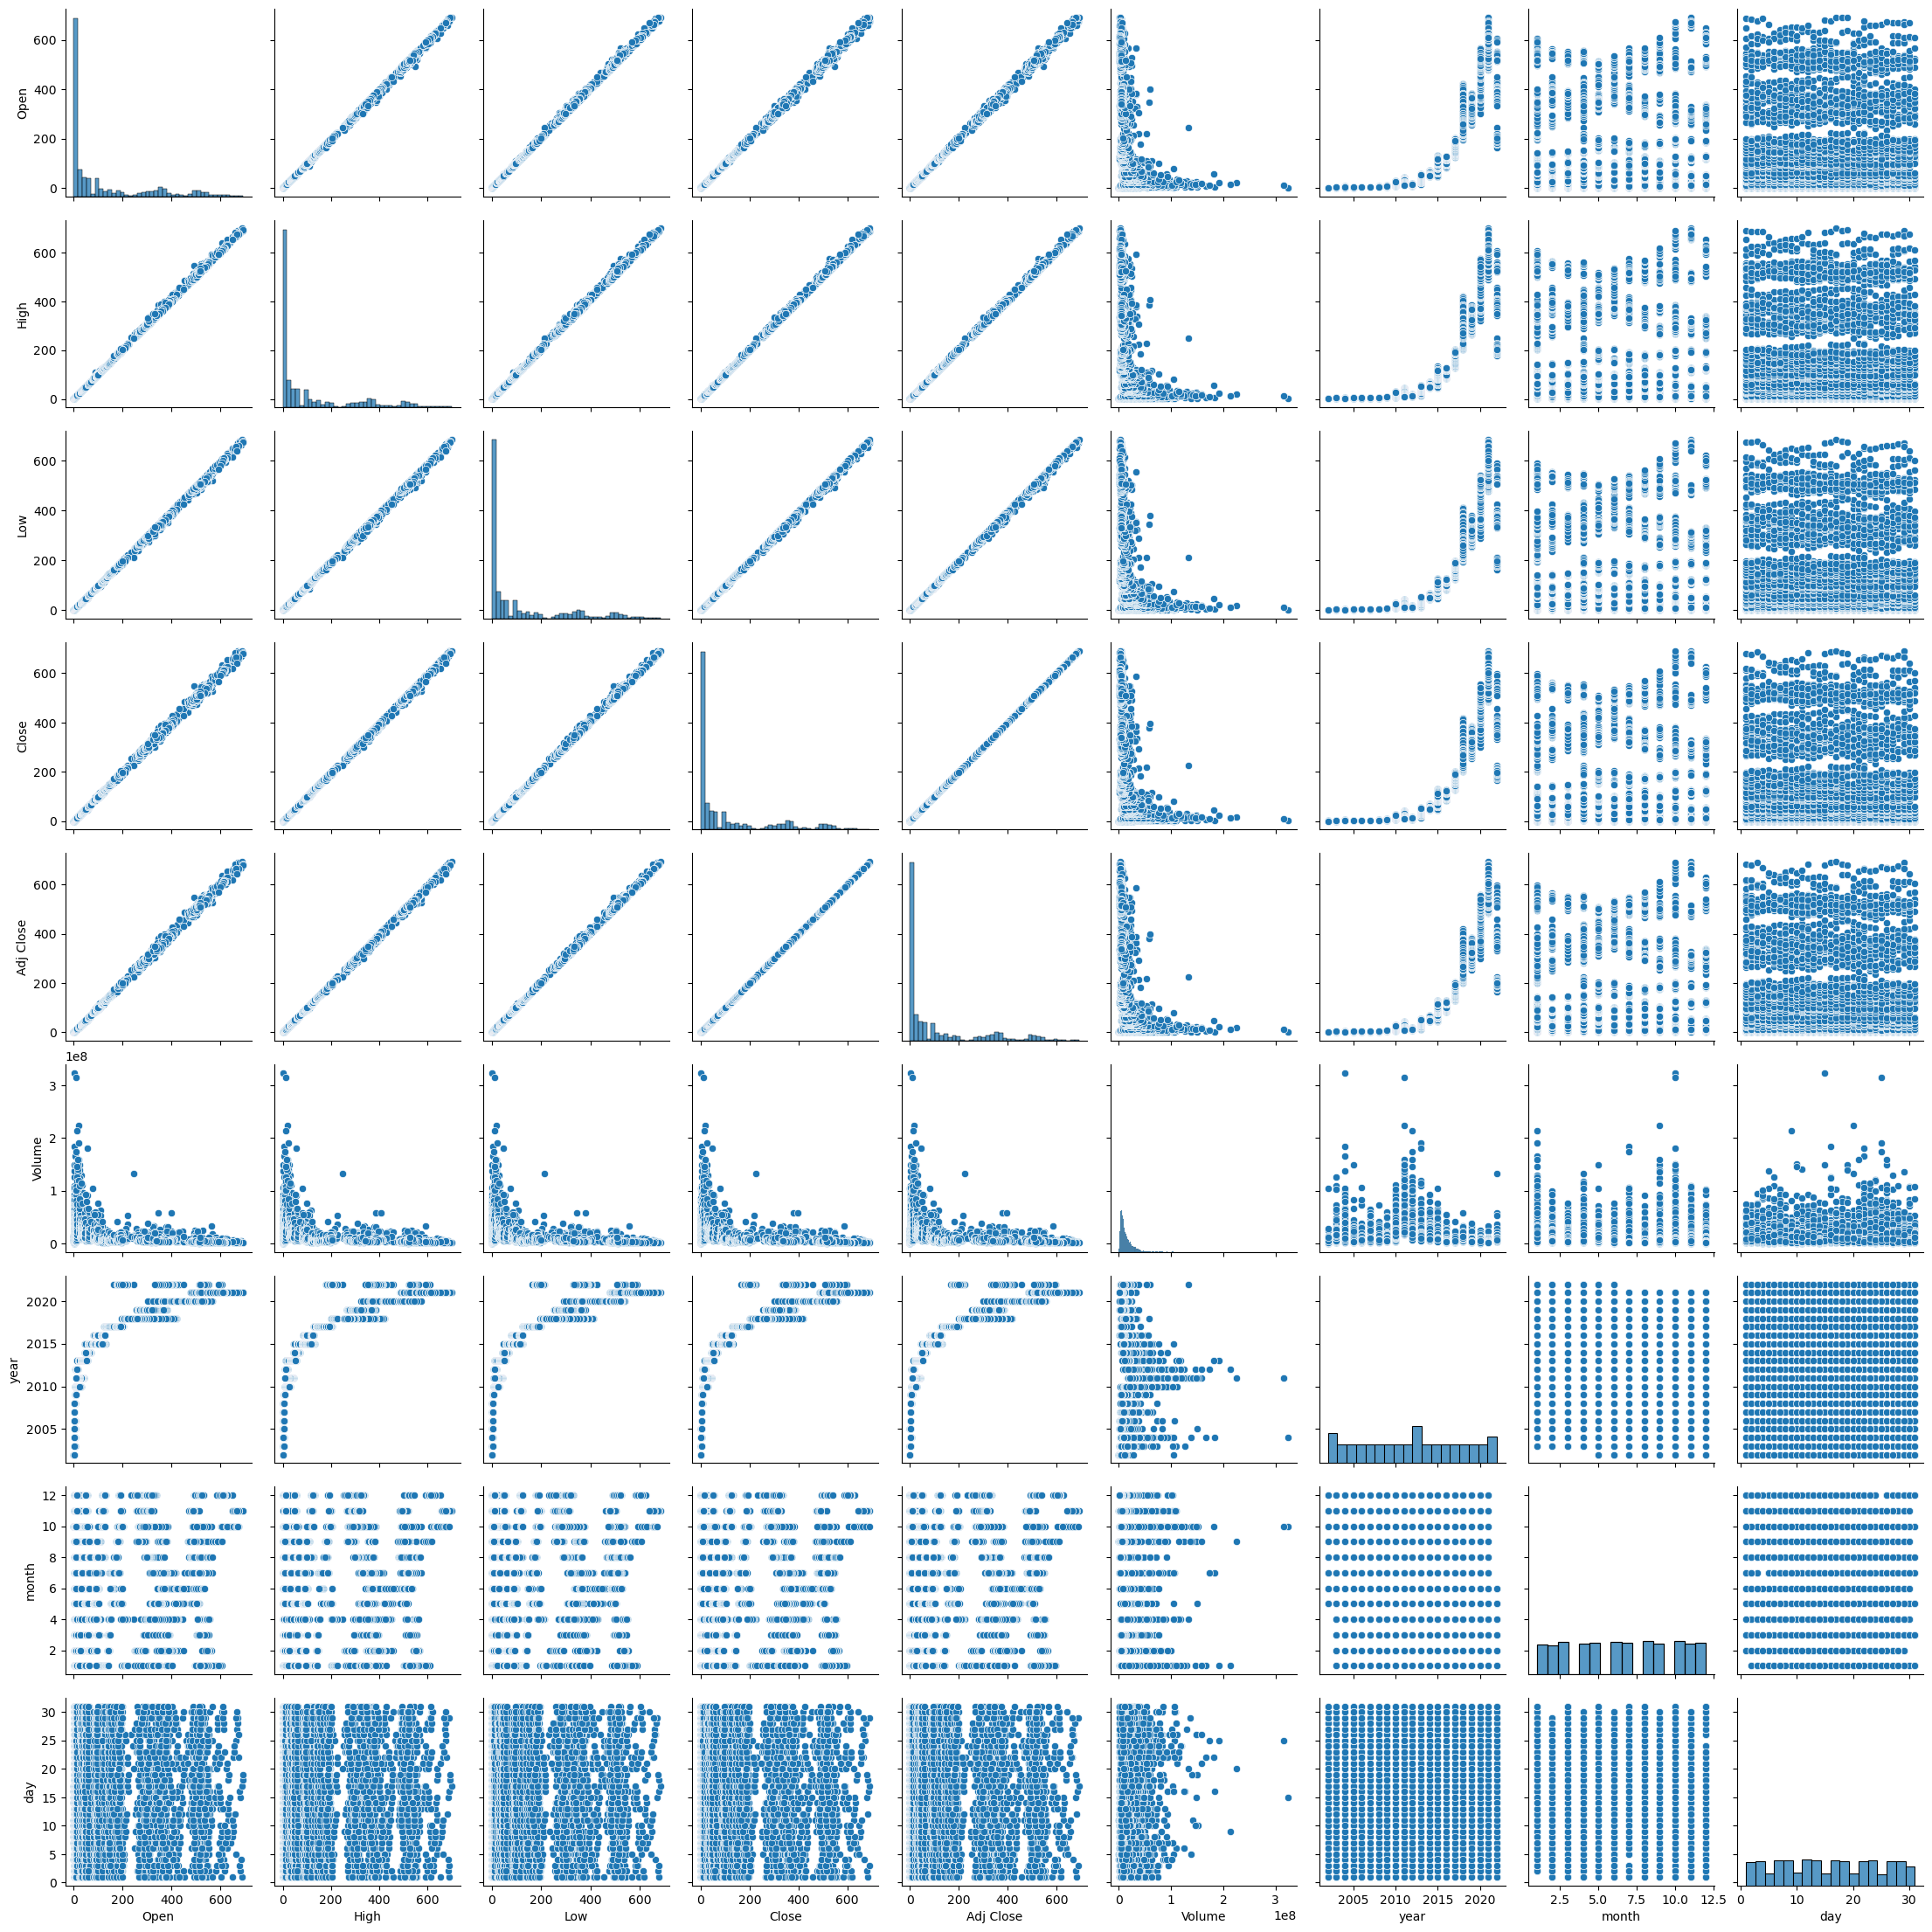

In [202]:
sns.pairplot(netflix)

# Data Destribution

C:\Users\Shivadnya\AppData\Local\Temp\ipykernel_33652\1719503055.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix['Close'])


<Axes: xlabel='Close', ylabel='Density'>

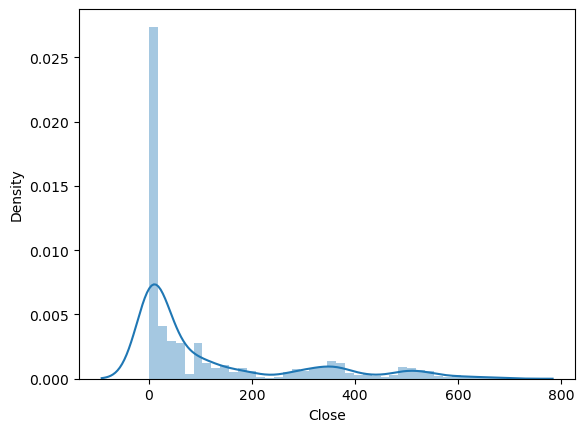

In [203]:
sns.distplot(netflix['Close'])

C:\Users\Shivadnya\AppData\Local\Temp\ipykernel_33652\1019524003.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix[i])


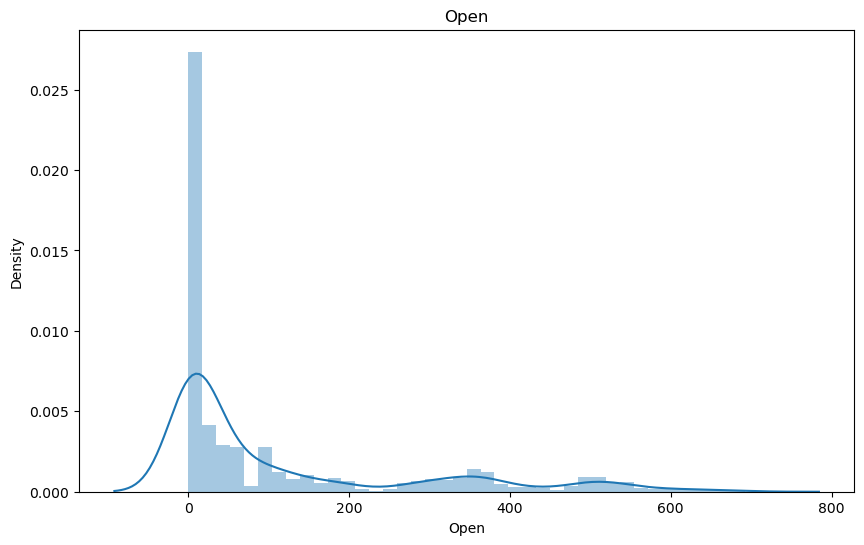

C:\Users\Shivadnya\AppData\Local\Temp\ipykernel_33652\1019524003.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix[i])


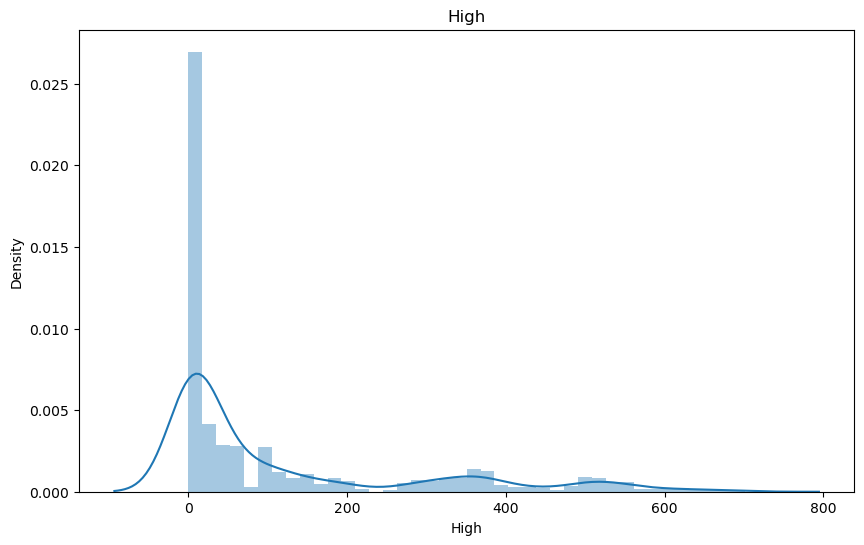

C:\Users\Shivadnya\AppData\Local\Temp\ipykernel_33652\1019524003.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix[i])


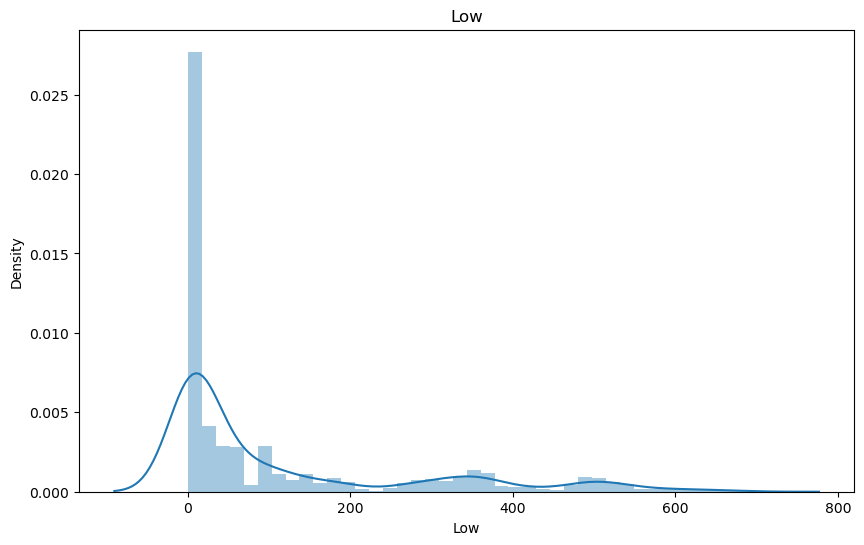

C:\Users\Shivadnya\AppData\Local\Temp\ipykernel_33652\1019524003.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix[i])


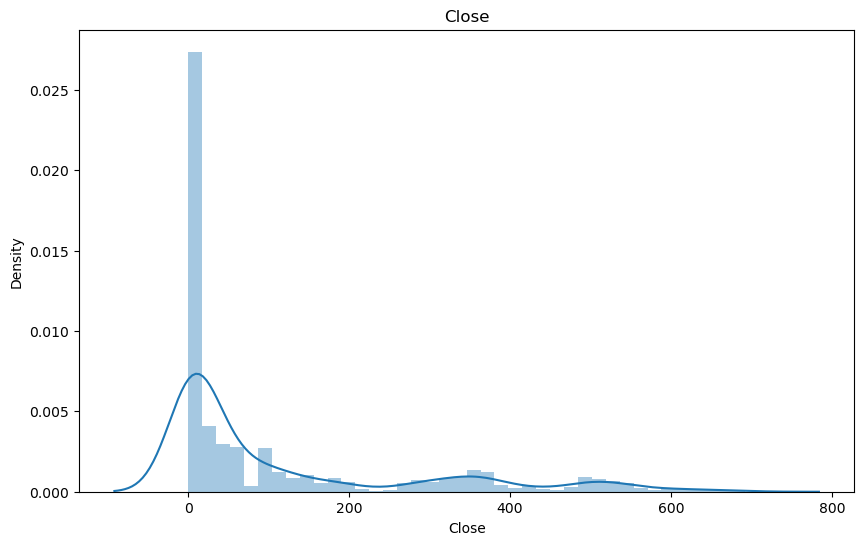

C:\Users\Shivadnya\AppData\Local\Temp\ipykernel_33652\1019524003.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix[i])


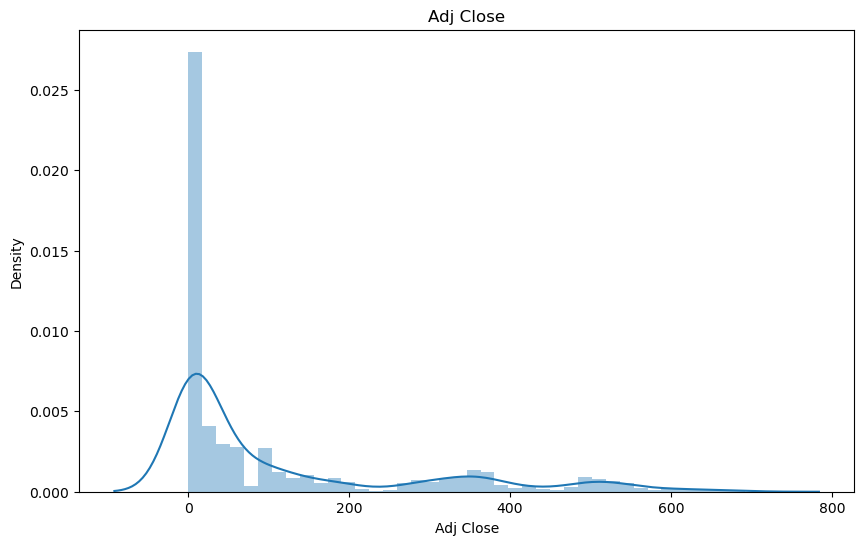

C:\Users\Shivadnya\AppData\Local\Temp\ipykernel_33652\1019524003.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix[i])


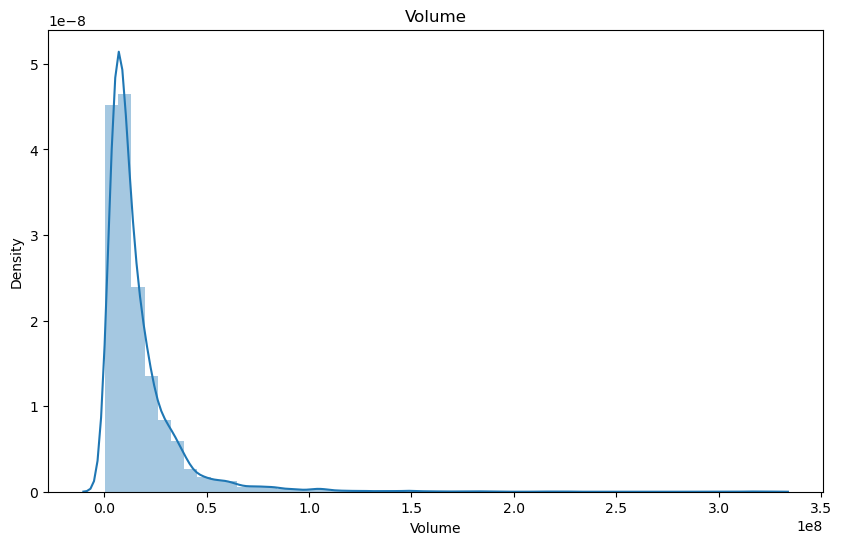

C:\Users\Shivadnya\AppData\Local\Temp\ipykernel_33652\1019524003.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix[i])


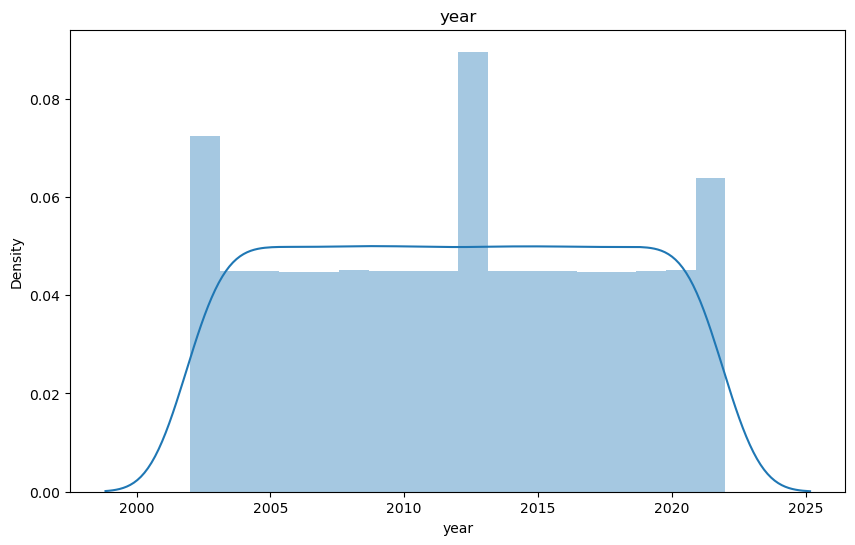

C:\Users\Shivadnya\AppData\Local\Temp\ipykernel_33652\1019524003.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix[i])


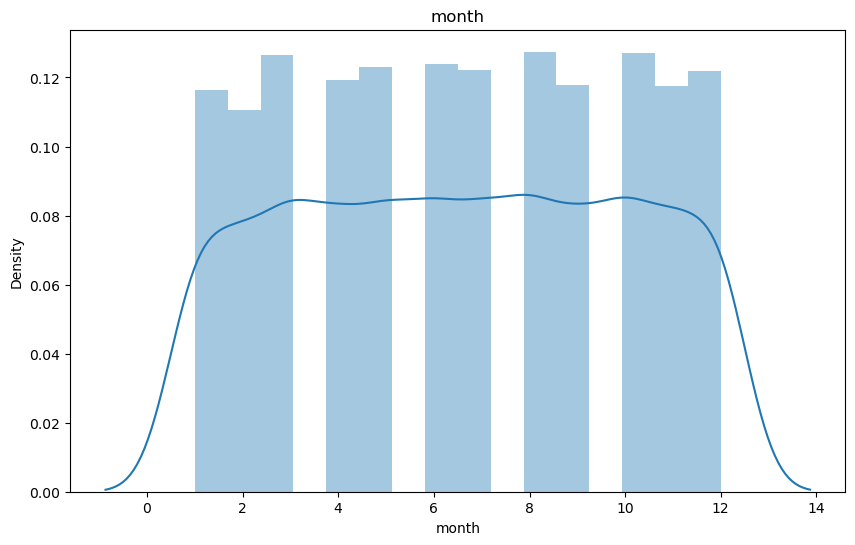

C:\Users\Shivadnya\AppData\Local\Temp\ipykernel_33652\1019524003.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix[i])


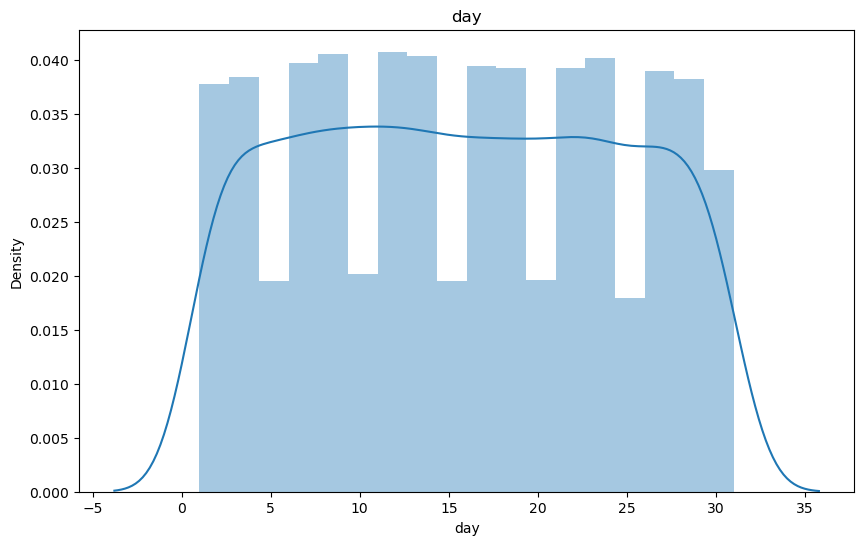

In [204]:
for i in netflix.columns:
    plt.figure(figsize=(10,6))
    sns.distplot(netflix[i])
    plt.title(i)
    plt.show()

# Test Train Split

In [205]:
X = netflix.drop('Close',axis=1)
y = netflix['Close']

In [206]:
X.shape

(5044, 8)

In [207]:
y.shape

(5044,)

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [210]:
X_train.shape

(4035, 8)

In [211]:
X_test.shape

(1009, 8)

# Normalizing Data using StandarScaler

In [212]:
from sklearn.preprocessing import StandardScaler

sclr = StandardScaler()

In [213]:
X_train = sclr.fit_transform(X_train)
X_test = sclr.transform(X_test)

In [214]:
X_train

array([[ 1.17210502,  1.15346737,  1.17061724, ...,  1.23166763,
         0.44153034, -1.11472316],
       [ 0.06781697,  0.07104359,  0.0772082 , ...,  0.71092659,
         1.0240299 ,  1.17487112],
       [-0.67416179, -0.67488933, -0.67397608, ..., -0.85129652,
         0.44153034, -1.68712174],
       ...,
       [-0.62252682, -0.62343258, -0.62450145, ...,  0.01660521,
        -0.432219  ,  0.03007398],
       [-0.09031511, -0.09661509, -0.09287766, ...,  0.71092659,
         0.73278012,  0.37351312],
       [-0.63652271, -0.63794516, -0.63768135, ...,  0.01660521,
         0.44153034, -0.31336517]])

# Regression

In [215]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
       
y_pred = lr.predict(X_test)       

In [216]:
y_pred

array([  3.342857,   1.61    ,  26.610001, ..., 175.779999,   8.121429,
       256.079987])

# Evaluation

In [217]:
from sklearn.metrics import r2_score, mean_squared_error

In [218]:
r2_score(y_test, y_pred)

1.0

In [223]:
r2_test = r2_score(y_test, y_pred)
print(f"Test R-squared: {r2_test}")

Test R-squared: 1.0


In [219]:
mean_squared_error(y_test,y_pred)

4.519019428099405e-26

# Prediction Model

In [220]:
def pred(Open,High,Low,Adj_Close,Volume,year,month,day):
  features = np.array([[Open,High,Low,Adj_Close,Volume,year,month,day]])
  features = sclr.fit_transform(features)
  prediction = lr.predict(features).reshape(1,-1)
  return prediction[0]

In [221]:
Open = 200.45
High = 250.45
Low = 150.45
Adj_Close = 100.34
Volume = 100.45
year = 2020
month = 8
day = 4


res = pred(Open,High,Low,Adj_Close,Volume,year,month,day)

In [222]:
print(res)

[114.91561916]


In [225]:
import pickle

pickle.dump(lr,open('model.pkl','wb'))